<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Importing-the-data-set-and-a-cursory-examination" data-toc-modified-id="Importing-the-data-set-and-a-cursory-examination-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Importing the data set and a cursory examination</a></span></li><li><span><a href="#Focusing-on-Schizophrenia." data-toc-modified-id="Focusing-on-Schizophrenia.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Focusing on Schizophrenia.</a></span></li><li><span><a href="#Focusing-on-Schizophrenia,-Alcoholism-and-Depression" data-toc-modified-id="Focusing-on-Schizophrenia,-Alcoholism-and-Depression-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Focusing on Schizophrenia, Alcoholism and Depression</a></span><ul class="toc-item"><li><span><a href="#Aside-on-long-column-names:" data-toc-modified-id="Aside-on-long-column-names:-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Aside on long column names:</a></span></li></ul></li><li><span><a href="#Subframe-of-United-States-Entries" data-toc-modified-id="Subframe-of-United-States-Entries-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Subframe of United States Entries</a></span></li><li><span><a href="#Pickle-and-DataFrames" data-toc-modified-id="Pickle-and-DataFrames-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Pickle and DataFrames</a></span></li></ul></li><li><span><a href="#Pickling-the-United-States-Dataframe" data-toc-modified-id="Pickling-the-United-States-Dataframe-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Pickling the United States Dataframe</a></span><ul class="toc-item"><li><span><a href="#Bringing-In-A-New-Dataset" data-toc-modified-id="Bringing-In-A-New-Dataset-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Bringing In A New Dataset</a></span></li><li><span><a href="#Merging-Data-sets" data-toc-modified-id="Merging-Data-sets-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Merging Data sets</a></span><ul class="toc-item"><li><span><a href="#Dropping-the-Entity" data-toc-modified-id="Dropping-the-Entity-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Dropping the Entity</a></span></li></ul></li><li><span><a href="#Models-to-Try-(Random-Forest)" data-toc-modified-id="Models-to-Try-(Random-Forest)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Models to Try (Random Forest)</a></span></li><li><span><a href="#Arima-Model:" data-toc-modified-id="Arima-Model:-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Arima Model:</a></span></li></ul></li></ul></div>

# Introduction


Welcome to our notebook analyzing mental health data. Herein we will be working through various techniques in data analysis and/or [data science](https://en.wikipedia.org/wiki/Data_science). The datasets were found by the author on Kaggle. Please contact me for further information at Jose.gj.chavez@gmail.com

In [1]:
!pwd

/Users/josechavez/WEB/jc_micro_projects/dataSnA/projectUno/notebooks


![Image](mentalData.jpeg)


## Importing the data set and a cursory examination

We import the necessary libraries (pandas as you may expect) and read in our csv data. Then we print using the head function with its default values (5) and print the columns of the dataframe. 


In [2]:
import pandas as pd


df_mental_health = pd.read_csv('prevalence-by-mental-and-substance-use-disorder.csv')

print(df_mental_health.head())

# Examine the columns

print(df_mental_health.columns)

        Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.228979                          
1                                           0.228120                          
2                                           0.227328                          
3                                           0.226468                          
4                                           0.225567                          

   Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.721207                             
1                                           0.719952                             
2                                           0.718418                             
3                     

As you can see the dataframe is relatively straighforward. It consists of records of various countries over the years along with the corresponding prevalence rates of an assortments of mental disorders.

## Focusing on Schizophrenia.

In [3]:
# Columns 

#print(df_mental_health.columns)
df_new = df_mental_health[['Entity', 'Code', 'Year', 'Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)']]

df_new = df_new.rename(columns={'Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)': 'Schizo'})
print(df_new.head())


#let's see what unique contries are present

unique_entities = df_new['Entity'].unique()

print(unique_entities)



#df_us = df_new[df_new['Entity'] == 'United States']

print(df_new)



        Entity Code  Year    Schizo
0  Afghanistan  AFG  1990  0.228979
1  Afghanistan  AFG  1991  0.228120
2  Afghanistan  AFG  1992  0.227328
3  Afghanistan  AFG  1993  0.226468
4  Afghanistan  AFG  1994  0.225567
['Afghanistan' 'African Region (WHO)' 'Albania' 'Algeria' 'American Samoa'
 'Andorra' 'Angola' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia'
 'Cuba' 'Cyprus' 'Czechia' 'Democratic Republic of Congo' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'East Asia & Pacific (WB)'
 'Eastern Mediterranean Region (WHO)' 'Ecuador' 'Egypt' 'El Salvador'
 'England' 'Equato

## Focusing on Schizophrenia, Alcoholism and Depression

Now we look to get start exploring the data set with respect to: depression, schizophrenia, and alcohol abuse. Notice that we use "\" to allow for continuing long lines (Python) and that we are creating a new dataframe using the column names of interest. The syntax for doing so is roughly speaking: `df[[<comma separated list of strings for column names>]]`

In [4]:
df_sad = df_mental_health[['Entity', 'Code', 'Year',\
                           'Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)',\
                           'Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)','Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)']]

print(df_sad.head())

#Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)',
 #      'Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)'

        Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.228979                          
1                                           0.228120                          
2                                           0.227328                          
3                                           0.226468                          
4                                           0.225567                          

   Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           5.125291                                 
1                                           5.116306                                 
2                                           5.106558                                 
3     

### Aside on long column names: 

Notice that the column names are a little unweildy. Moreover, there are natural choices for shorter column names. We can use pandas methods to simplify/shorten the names while retaining the ability to print the dataframe and still know what the columns correspond to. 

In [5]:
df_sad = df_sad.rename(columns={'Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)': 'Schizo'})
df_sad = df_sad.rename(columns={'Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)': 'Depp'})
df_sad = df_sad.rename(columns={'Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)': 'Alch'})


## Subframe of United States Entries

             Entity Code  Year    Schizo      Depp      Alch
6330  United States  USA  1990  0.467115  4.068695  3.111360
6331  United States  USA  1991  0.472488  4.196610  3.022482
6332  United States  USA  1992  0.477502  4.323224  2.937071
6333  United States  USA  1993  0.481847  4.443956  2.858443
6334  United States  USA  1994  0.485216  4.554388  2.790028


array([[<Axes: xlabel='Year', ylabel='Year'>,
        <Axes: xlabel='Schizo', ylabel='Year'>,
        <Axes: xlabel='Depp', ylabel='Year'>,
        <Axes: xlabel='Alch', ylabel='Year'>],
       [<Axes: xlabel='Year', ylabel='Schizo'>,
        <Axes: xlabel='Schizo', ylabel='Schizo'>,
        <Axes: xlabel='Depp', ylabel='Schizo'>,
        <Axes: xlabel='Alch', ylabel='Schizo'>],
       [<Axes: xlabel='Year', ylabel='Depp'>,
        <Axes: xlabel='Schizo', ylabel='Depp'>,
        <Axes: xlabel='Depp', ylabel='Depp'>,
        <Axes: xlabel='Alch', ylabel='Depp'>],
       [<Axes: xlabel='Year', ylabel='Alch'>,
        <Axes: xlabel='Schizo', ylabel='Alch'>,
        <Axes: xlabel='Depp', ylabel='Alch'>,
        <Axes: xlabel='Alch', ylabel='Alch'>]], dtype=object)

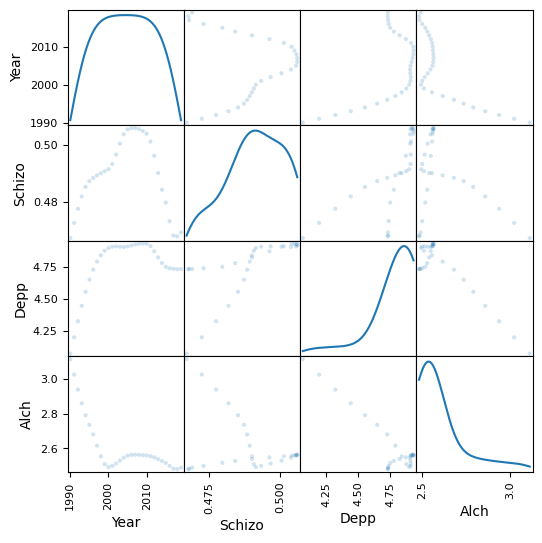

In [6]:
grouped = df_sad.groupby('Entity')
print(grouped)

#df_us_sad=grouped

#print(df_us_sad)
#df_us_sad = df_sad[['Code', 'Year', 'Schizo']]
#df_united_inSad = df_sad[df_sad['Entity' == 'United States']]
df_united_inSad = df_sad[df_sad['Entity'] == 'United States']


#print(df_us_new)

#df_us_sad.to_pickle('df_us_new_schizo.pkl')

print(df_united_inSad.head())

import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np

# Assuming df is your DataFrame and it already exists
# df = pd.DataFrame(np.random.randn(1000, 4), columns=['a', 'b', 'c', 'd'])

scatter_matrix(df_united_inSad, alpha=0.2, figsize=(6, 6), diagonal='kde')


In [7]:
pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://packagecloud.io/pimutils/khal/pypi/simple

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


   Now let's pause and consider what is possible with what we have now.  Our `df

   Now let's pause and consider what is possible with what we have now.  Our `df_united...` data frame can pretty clearly be used to examine lineawr relationships amongst Schizophrenia, Depression and Alcoholism (in the United States). 

             Entity Code  Year    Schizo      Depp      Alch
6330  United States  USA  1990  0.467115  4.068695  3.111360
6331  United States  USA  1991  0.472488  4.196610  3.022482
6332  United States  USA  1992  0.477502  4.323224  2.937071
6333  United States  USA  1993  0.481847  4.443956  2.858443
6334  United States  USA  1994  0.485216  4.554388  2.790028
              Year     Schizo       Depp       Alch
count    30.000000  30.000000  30.000000  30.000000
mean   2004.500000   0.489256   4.755258   2.613989
std       8.803408   0.012945   0.225955   0.166118
min    1990.000000   0.467115   4.068695   2.481960
25%    1997.250000   0.480224   4.732868   2.514782
50%    2004.500000   0.490101   4.833537   2.555633
75%    2011.750000   0.501105   4.910971   2.603112
max    2019.000000   0.506018   4.933798   3.111360


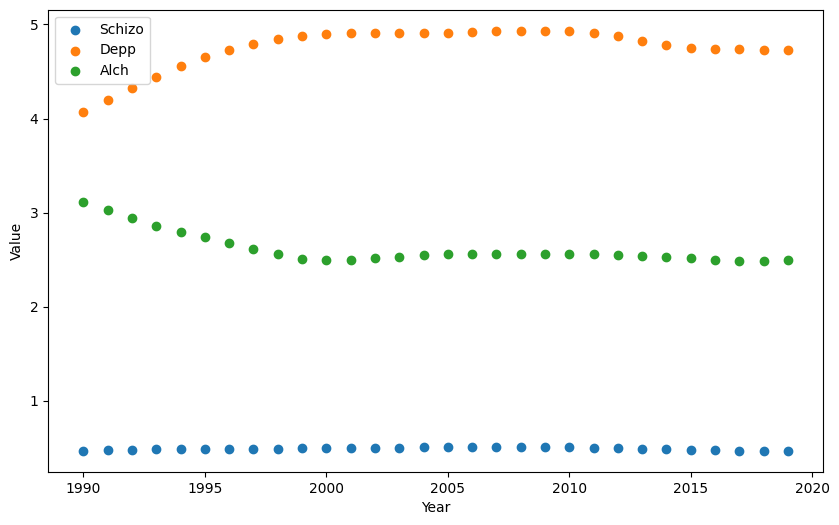

                            OLS Regression Results                            
Dep. Variable:                 Schizo   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.036
Method:                 Least Squares   F-statistic:                 0.0001566
Date:                Fri, 04 Aug 2023   Prob (F-statistic):              0.990
Time:                        19:45:07   Log-Likelihood:                 88.353
No. Observations:                  30   AIC:                            -172.7
Df Residuals:                      28   BIC:                            -169.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4823      0.557      0.866      0.3

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

print(df_united_inSad.head())
print(df_united_inSad.describe())

plt.figure(figsize=(10, 6))
plt.scatter(df_united_inSad['Year'], df_united_inSad['Schizo'], label='Schizo')
plt.scatter(df_united_inSad['Year'], df_united_inSad['Depp'], label='Depp')
plt.scatter(df_united_inSad['Year'], df_united_inSad['Alch'], label='Alch')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()
#Now, let's run a linear regression for each of 'Schizo', 'Depp', and 'Alch' against 'Year'. We'll use the OLS function from statsmodels to do this:


# Add a constant to the DataFrame for the linear regression
df_united_inSad = sm.add_constant(df_united_inSad)

# Run a linear regression for 'Schizo' against 'Year'
model_schizo = sm.OLS(df_united_inSad['Schizo'], df_united_inSad[['const', 'Year']])
results_schizo = model_schizo.fit()
print(results_schizo.summary())

# Run a linear regression for 'Depp' against 'Year'
model_depp = sm.OLS(df_united_inSad['Depp'], df_united_inSad[['const', 'Year']])
results_depp = model_depp.fit()
print(results_depp.summary())

# Run a linear regression for 'Alch' against 'Year'
model_alch = sm.OLS(df_united_inSad['Alch'], df_united_inSad[['const', 'Year']])
results_alch = model_alch.fit()
print(results_alch.summary())


## Pickle and DataFrames

One nice thing about csv files is that they can be readily shared. How about Python objects? Well we have two options for saving our dataframes. We can methods that ship with Pandas or we can use the pickle library. The disadvantage of the Pickle library is that it saves the dataframes a list. So to avoid extra work we use the built in method. 

# Pickling the United States Dataframe


In [9]:
#import pickle

# Assuming dfs is your list of DataFrames
#with open('dataframes_sui.pkl', 'wb') as f:
   #pickle.dump(df_us_new, f)

In [10]:
#df_us_new.to_pickle("df_new_ca_math8.pkl")


In [11]:
!ls


Bringing DataFrames Together.ipynb
Crimes_-_2001_to_Present.csv
Data_Analysis_Notebook_HAHA_pleasebehere.ipynb
Education Data United States Exploration.ipynb
Gallup_rel.csv
JavaScript Data Analysis Similar Project 2023.ipynb
Mental Health Data Exploration .ipynb
Religious Data Exploration Process.ipynb
Stocks Data .ipynb
Suicides In US .ipynb
Tech Stocks, MH and Suicide Rates.ipynb
US Religion Census Top 0 Religious Groups (2020) (Downloaded from thearda.com on Sun Jul 30, 2023).csv
US Schizophrenia, Stock Prices and .ipynb
df_stocks.pkl
mentalData.jpeg
merged_df_mentalhealthde2023-08-04 18:53:36.pickle
prevalence-by-mental-and-substance-use-disorder.csv
religious.csv
states_edu.csv
stock_data.csv
us_sui_rates.csv


In [12]:
#import pandas as pd

#pickled_dfs = ['dataframes_adj_religion.pkl', 'dataframes_edu.pkl', 'dataframes_new_ca_math.pkl', 'dataframes_stocks.pkl', 'dataframes_sui.pkl']
#dataframes = []

# Loop through the list of pickle files
#for file in pickled_dfs:
    # Load the DataFrame from the pickle file and append it to the list
 #   df = pd.read_pickle(file)
  #  dataframes.append(df)

    
#print(dataframes)

In [13]:
!ls|grep ipyn


Bringing DataFrames Together.ipynb
Data_Analysis_Notebook_HAHA_pleasebehere.ipynb
Education Data United States Exploration.ipynb
JavaScript Data Analysis Similar Project 2023.ipynb
Mental Health Data Exploration .ipynb
Religious Data Exploration Process.ipynb
Stocks Data .ipynb
Suicides In US .ipynb
Tech Stocks, MH and Suicide Rates.ipynb
US Schizophrenia, Stock Prices and .ipynb


In [14]:
import glob
import pandas as pd

# Find all pickle files in the current directory
pickled_dfs = glob.glob('./*.pkl')

dataframes_from = []

def import_pkls_from_dir():
    # Loop through the list of pickle files
    for file in pickled_dfs:
        # Load the DataFrame from the pickle file and append it to the list
        df = pd.read_pickle(file)
        dataframes_from.append(df)
        print(dataframes_from)

import_pkls_from_dir()

print(dataframes_from)


[   Ticker  Year  Average Close
0    AAPL  2010       9.280088
1    AAPL  2011      13.000154
2    AAPL  2012      20.573204
3    AAPL  2013      16.879817
4    AAPL  2014      23.066164
5    AAPL  2015      30.010000
6    AAPL  2016      26.151002
7    AAPL  2017      37.637769
8    AAPL  2018      47.263357
9    AAPL  2019      52.063988
10   AAPL  2020      95.347075
11   AAPL  2021     140.989365
12   AAPL  2022     154.835060
13   AAPL  2023     165.059231
14   MSFT  2010      27.058571
15   MSFT  2011      26.052341
16   MSFT  2012      29.820960
17   MSFT  2013      32.491905
18   MSFT  2014      42.453492
19   MSFT  2015      46.714286
20   MSFT  2016      55.259325
21   MSFT  2017      71.984024
22   MSFT  2018     101.033984
23   MSFT  2019     130.382024
24   MSFT  2020     193.026126
25   MSFT  2021     275.940754
26   MSFT  2022     268.917091
27   MSFT  2023     291.917272
28   NVDA  2010       3.390794
29   NVDA  2011       4.221885
30   NVDA  2012       3.376970
31   NV

## Bringing In A New Dataset

Now I would like to get a feel for another important aspect of data analysis. What we are to do next in sequence:
* perform "data engineering":merging datasets ;
* perform "data analysis" by exploring our data after its prepared and possibly forming questions we might seek to answer or at least explore;
* perform machine learning if the engineered data is amenable to corredsponding methods/techniques.

<strong> The new Dataset </strong>

It is natural to wonder what relationships over time might hold between suicide rates and these mental disorders we've been exploring. We bring in a new dataset and use it to see if we might uncover expected (or unexpected relationships).

In [15]:
import pandas as pd


df_sui_rates = pd.read_csv('us_sui_rates.csv')
print(df_sui_rates.head())

df_simps = df_sui_rates[['INDICATOR', 'YEAR', 'AGE_NUM','ESTIMATE']]

                 INDICATOR                                               UNIT  \
0  Death rates for suicide  Deaths per 100,000 resident population, age-ad...   
1  Death rates for suicide  Deaths per 100,000 resident population, age-ad...   
2  Death rates for suicide  Deaths per 100,000 resident population, age-ad...   
3  Death rates for suicide  Deaths per 100,000 resident population, age-ad...   
4  Death rates for suicide  Deaths per 100,000 resident population, age-ad...   

   UNIT_NUM STUB_NAME  STUB_NAME_NUM   STUB_LABEL  STUB_LABEL_NUM  YEAR  \
0         1     Total              0  All persons             0.0  1950   
1         1     Total              0  All persons             0.0  1960   
2         1     Total              0  All persons             0.0  1970   
3         1     Total              0  All persons             0.0  1980   
4         1     Total              0  All persons             0.0  1981   

   YEAR_NUM       AGE  AGE_NUM  ESTIMATE FLAG  
0         1  A

In [16]:
print(df_simps.head(10))

num_unique_values = df_simps['INDICATOR'].nunique()
print(num_unique_values)


# Identify columns to drop
cols_to_drop = [col for col in df_simps.columns if df_simps[col].nunique() == 1]

# Drop these columns
df_dsimps = df_simps.drop(cols_to_drop, axis=1)

print(df_dsimps.head())

                 INDICATOR  YEAR  AGE_NUM  ESTIMATE
0  Death rates for suicide  1950      0.0      13.2
1  Death rates for suicide  1960      0.0      12.5
2  Death rates for suicide  1970      0.0      13.1
3  Death rates for suicide  1980      0.0      12.2
4  Death rates for suicide  1981      0.0      12.3
5  Death rates for suicide  1982      0.0      12.5
6  Death rates for suicide  1983      0.0      12.4
7  Death rates for suicide  1984      0.0      12.6
8  Death rates for suicide  1985      0.0      12.5
9  Death rates for suicide  1986      0.0      13.0
1
   YEAR  AGE_NUM  ESTIMATE
0  1950      0.0      13.2
1  1960      0.0      12.5
2  1970      0.0      13.1
3  1980      0.0      12.2
4  1981      0.0      12.3


Before we try and merge data sets let's consider what we have here. We see a columnt hat could be said to be shared at lesat in part between this new dataframe and our schizophrenia dataset/dataframe. We can therefore for one, plan on merging along shared years.

In [28]:
df_sui_rates.columns

df_sui_rates.to_pickle('sui0804.pkl')

df_united_inSad.to_pickle('unisad.pkl')

In [29]:
!pwd

/Users/josechavez/WEB/jc_micro_projects/dataSnA/projectUno/notebooks


In [24]:
print(df_united_inSad.head(50))

      const         Entity Code  Year    Schizo      Depp      Alch
6330    1.0  United States  USA  1990  0.467115  4.068695  3.111360
6331    1.0  United States  USA  1991  0.472488  4.196610  3.022482
6332    1.0  United States  USA  1992  0.477502  4.323224  2.937071
6333    1.0  United States  USA  1993  0.481847  4.443956  2.858443
6334    1.0  United States  USA  1994  0.485216  4.554388  2.790028
6335    1.0  United States  USA  1995  0.487275  4.649917  2.735402
6336    1.0  United States  USA  1996  0.488420  4.728877  2.680183
6337    1.0  United States  USA  1997  0.489322  4.792297  2.616027
6338    1.0  United States  USA  1998  0.490074  4.841765  2.555207
6339    1.0  United States  USA  1999  0.490764  4.877494  2.510123
6340    1.0  United States  USA  2000  0.491473  4.899882  2.493354
6341    1.0  United States  USA  2001  0.493311  4.910241  2.499927
6342    1.0  United States  USA  2002  0.496664  4.912093  2.513923
6343    1.0  United States  USA  2003  0.500509 

In [26]:
print(df_dsimps.head(50))


    YEAR  AGE_NUM  ESTIMATE
0   1950      0.0      13.2
1   1960      0.0      12.5
2   1970      0.0      13.1
3   1980      0.0      12.2
4   1981      0.0      12.3
5   1982      0.0      12.5
6   1983      0.0      12.4
7   1984      0.0      12.6
8   1985      0.0      12.5
9   1986      0.0      13.0
10  1987      0.0      12.8
11  1988      0.0      12.5
12  1989      0.0      12.3
13  1990      0.0      12.5
14  1991      0.0      12.3
15  1992      0.0      12.0
16  1993      0.0      12.1
17  1994      0.0      11.9
18  1995      0.0      11.8
19  1996      0.0      11.5
20  1997      0.0      11.2
21  1998      0.0      11.1
22  1999      0.0      10.5
23  2000      0.0      10.4
24  2001      0.0      10.7
25  2002      0.0      10.9
26  2003      0.0      10.8
27  2004      0.0      11.0
28  2005      0.0      10.9
29  2006      0.0      11.0
30  2007      0.0      11.3
31  2008      0.0      11.6
32  2009      0.0      11.8
33  2010      0.0      12.1
34  2011      0.0   

## Merging Data sets

Storing a dataframe with simpler column names in a new dataframe. 


Now let's try and merge dataframes. Notice that b


In [31]:
print(df_united_inSad.head(20))
print(df_dsimps.head(20))

# Merge the dataframes (same as i had before)
#merged_df = df_united_inSad.merge(df_dsimps, left_on='Year', right_on='YEAR', how='left')

# Display the first few rows of the merged dataframe
#merged_df.head()


#merged_df = df_united_inSad.merge(df_dsimps, left_on='Year', right_on='YEAR', how='left')

# Aggregate df_dsimps by year, taking the mean of the other columns
df_dsimps_agg = df_dsimps.groupby('YEAR').mean().reset_index()

# Merge the dataframes again
merged_df_agg = df_united_inSad.merge(df_dsimps_agg, left_on='Year', right_on='YEAR', how='left')

# Display the first few rows of the new merged dataframe
merged_df_agg.head()


#I want to keep the merge_df name for now (through the aid in getting unique values iwht GPTs help) 2023-08-04 20:11:07 
#print(merged_df.head(10))
merged_df=merged_df_agg

#display(merged_df)


      const         Entity Code  Year    Schizo      Depp      Alch
6330    1.0  United States  USA  1990  0.467115  4.068695  3.111360
6331    1.0  United States  USA  1991  0.472488  4.196610  3.022482
6332    1.0  United States  USA  1992  0.477502  4.323224  2.937071
6333    1.0  United States  USA  1993  0.481847  4.443956  2.858443
6334    1.0  United States  USA  1994  0.485216  4.554388  2.790028
6335    1.0  United States  USA  1995  0.487275  4.649917  2.735402
6336    1.0  United States  USA  1996  0.488420  4.728877  2.680183
6337    1.0  United States  USA  1997  0.489322  4.792297  2.616027
6338    1.0  United States  USA  1998  0.490074  4.841765  2.555207
6339    1.0  United States  USA  1999  0.490764  4.877494  2.510123
6340    1.0  United States  USA  2000  0.491473  4.899882  2.493354
6341    1.0  United States  USA  2001  0.493311  4.910241  2.499927
6342    1.0  United States  USA  2002  0.496664  4.912093  2.513923
6343    1.0  United States  USA  2003  0.500509 

### Dropping the Entity

Since we already know (in context) that everything in this latest dataframe is related to United States data, we can go ahead and drop that column. 

## Models to Try (Random Forest)

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

merged_df['ESTIMATE'] = merged_df['ESTIMATE'].fillna(merged_df['ESTIMATE'].mean())

# Assume that you want to predict 'ESTIMATE' based on ['Schizo', 'Depp', 'Alch', 'AGE_NUM']
X = merged_df[['Schizo', 'Depp', 'Alch', 'AGE_NUM']]
y = merged_df['ESTIMATE']
X = X.fillna(X.mean())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)






In [33]:
merged_df.to_pickle('merged_df_mentalhealthde2023-08-04 18:53:36.pickle')


<strong> Discusssion on Random Forests </strong>:

Let's take a look at what random forests are (roughly speaking) as well as how to evaluate them and what plots can tell us about our models' accuracy. 


1. **Random Forest Model:** The Random Forest model is an ensemble learning method that operates by constructing multiple decision trees during training and outputting the mean prediction of the individual trees for regression tasks or the class that has the most votes for classification tasks. The main idea behind Random Forest is that a group of "weak learners" can come together to form a "strong learner". Each tree is trained on a random subset of the data and a random subset of the features, which helps to make the model robust to overfitting.

2. **Model Evaluation Metrics:** The Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) are all measures of the difference between the values predicted by the model and the actual values. 

   - **MAE** is the average of the absolute differences between the predicted and actual values. It gives an idea of how wrong the predictions were. The measure gives an equal weight to all errors, whether they are big or small. In contrast to the MSE, the MAE needs no square root to be understood and its unit is the same as the original data.

   - **MSE** is similar to MAE but squares the differences before they are averaged. This means that larger errors are noted more than with MAE. This can be useful if you want to pay more attention to outliers.

   - **RMSE** is the square root of MSE. It is more sensitive to larger errors than MAE, but its interpretation is easier than MSE because its units are the same as the original data.

3. **Scatter Plot:** The scatter plot of actual vs predicted values is a graphical tool for comparing the model's predictions with the actual values. Each point on the plot represents a single data point (or instance). The x-coordinate of the point represents the actual value of the target variable for that instance, and the y-coordinate represents the value that the model predicted.

   - If the model's predictions are perfect, all points would lie on a straight diagonal line going from the bottom left to the top right of the plot. This is because for every instance, the predicted value would be equal to the actual value, placing the point along this line.

   - If the points are scattered far from this line, it means that there are instances where the model's predictions are far from the actual values. The further a point is from the line, the larger the error for that instance.

   - If the points seem to form a pattern that deviates from the diagonal line (for example, if they form a curve), it might indicate that the model is systematically mispredicting certain values. This could suggest that the model could be improved, for example by using a different type of model or by engineering new features.

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate errors
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)


Mean Absolute Error: 8.42745575493068
Mean Squared Error: 136.25288581868358
Root Mean Squared Error: 11.67274114416505


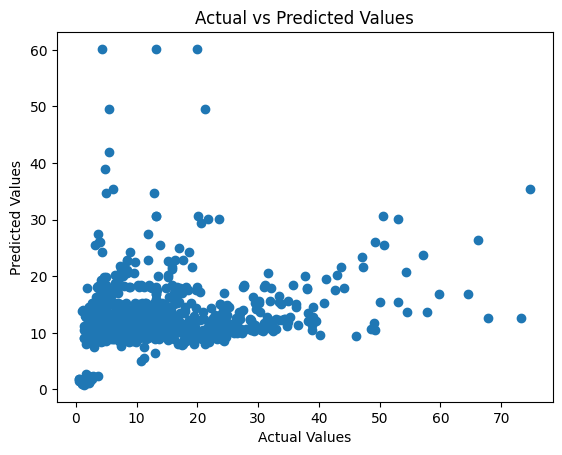

In [22]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


## Arima Model:

                               SARIMAX Results                                
Dep. Variable:               ESTIMATE   No. Observations:                 4597
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -16728.300
Date:                Fri, 04 Aug 2023   AIC                          33468.599
Time:                        19:45:08   BIC                          33507.197
Sample:                             0   HQIC                         33482.185
                               - 4597                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3687      0.011    -32.898      0.000      -0.391      -0.347
ar.L2         -0.1969      0.014    -14.382      0.000      -0.224      -0.170
ar.L3         -0.1193      0.018     -6.782      0.0

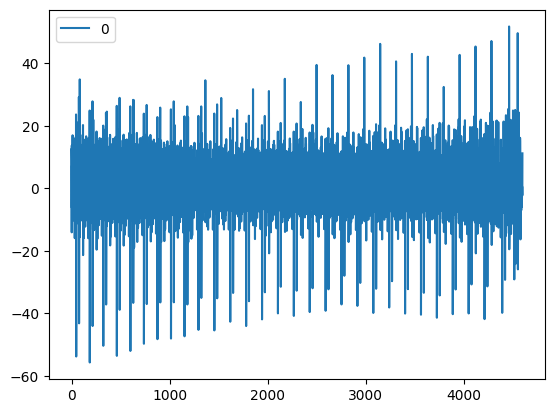

In [23]:

from statsmodels.tsa.arima.model import ARIMA

# Assume that you want to forecast 'ESTIMATE' and df is your DataFrame
model = ARIMA(merged_df['ESTIMATE'], order=(5,1,0)) # (p,d,q) where p = periods taken for autoregressive model
                                             # d = Integrated order, difference
                                             # q = periods in moving average model
model_fit = model.fit()
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()


Let's examine the significance of each returned parameter. 
1. **Dep. Variable:** This is the dependent variable that the model is trying to predict. In your case, it's 'ESTIMATE'.

2. **No. Observations:** This is the number of observations (i.e., data points or rows in your DataFrame) that the model was trained on.

3. **Model:** This is the type of model that was used, along with the order of the AR (autoregressive), I (integrated), and MA (moving average) components. In your case, it's an ARIMA model with order (5, 1, 0).

4. **Log Likelihood:** This is the log of the likelihood function, which is a measure of how well the model fits the data. The higher the log likelihood, the better the model fits the data.

5. **AIC:** This stands for Akaike Information Criterion. It's a measure that takes into account both the goodness of fit of the model and the complexity of the model. The lower the AIC, the better the model is considered to be.

6. **BIC:** This stands for Bayesian Information Criterion. Like AIC, it also takes into account the goodness of fit and the complexity of the model, but it penalizes models with more parameters more heavily than AIC. The lower the BIC, the better the model is considered to be.

7. **HQIC:** This stands for Hannan-Quinn Information Criterion. It's another measure like AIC and BIC, but with a different penalty for the number of parameters. The lower the HQIC, the better the model is considered to be.

8. **Covariance Type:** This indicates the method used to compute the covariance matrix of the parameters. In your case, it's 'opg' which stands for outer product of gradients.

9. **coef:** These are the coefficients of the AR terms in the model. Each coefficient represents the impact of a one-unit increase in the corresponding lagged value of the dependent variable on the current value of the dependent variable.

10. **std err:** These are the standard errors of the coefficients. The standard error is a measure of the statistical accuracy of an estimate.

11. **z:** These are the z-scores of the coefficients. The z-score is the coefficient divided by its standard error.

12. **P>|z|:** These are the p-values associated with the z-scores. The p-value is the probability of obtaining a result as extreme as the observed result, under the null hypothesis.

13. **[0.025 0.975]:** These are the 95% confidence intervals for the coefficients. The confidence interval is a range of values, derived from the standard error, that is likely to contain the true value of the coefficient.

14. **sigma2:** This is the variance of the residuals (i.e., the difference between the observed and predicted values).

15. **Ljung-Box (L1) (Q):** This is a test statistic for the null hypothesis that the residuals are independently distributed. If the p-value (Prob(Q)) is small, you can reject the null hypothesis and conclude that the residuals are not independently distributed.

16. **Jarque-Bera (JB):** This is a test statistic for the null hypothesis that the residuals are normally distributed. If the p-value (Prob(JB)) is small, you can reject the null hypothesis and conclude that the residuals are not normally distributed.

17. **Heteroskedasticity (H):** This is a test statistic for the null hypothesis that the variance of the residuals is constant (i.e., the residuals are homoskedastic). If the p-value (Prob(H)) is small, you can reject the null hypothesis and conclude that the residuals are heteroskedastic.

18. **Skew:** This is a measure of the asymmetry of the distribution of the residuals. A positive skew indicates that the residuals are skewed to the right, and a negative skew indicates that they are skewed to the left.

19. **Kurtosis:** This is a measure of the "tailedness" of the distribution of the residuals. A high kurtosis indicates that the distribution has heavy tails and a sharp peak, and a low kurtosis indicates that the distribution has light tails and a flat peak.

Summary and next steps:

Recall that the column "Estimate" came from the data on suicide rates in the US. So with that in mind let's come up with some interpretations of our work herein and future directions:

1. Interpretations



2. Future:
    * merge another data set and explore more (our plan is stocks data from the three big tech companies)